In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
#Importemos el archivo: supermarket_sales.csv
url = 'https://raw.githubusercontent.com/FFernandezP/Supermarket/main/supermarket_sales.csv'
df = pd.read_csv(url)


In [3]:
#Head del df
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
#Veamos el shape
df.shape


(1000, 17)

In [6]:
#Totalidad de registros por columnas
df.count()


Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [7]:
#Tipo de dato de cada columna
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
#Comprobando missing values
print(df.isnull())


     Invoice ID  Branch   City  Customer type  Gender  Product line  \
0         False   False  False          False   False         False   
1         False   False  False          False   False         False   
2         False   False  False          False   False         False   
3         False   False  False          False   False         False   
4         False   False  False          False   False         False   
..          ...     ...    ...            ...     ...           ...   
995       False   False  False          False   False         False   
996       False   False  False          False   False         False   
997       False   False  False          False   False         False   
998       False   False  False          False   False         False   
999       False   False  False          False   False         False   

     Unit price  Quantity  Tax 5%  Total   Date   Time  Payment   cogs  \
0         False     False   False  False  False  False    False  False   

In [10]:
#Principales medidas estadisticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


Ahora bien, a través del uso del Análisis Bivariado, trataremos de responder una serie de preguntas de negocio.

1. ¿Los ingresos brutos afectan las calificaciones que brindan los clientes?

Podemos usar el diagrama de dispersión para responder a esta pregunta.

Text(0.5, 1.0, 'Relacion entre Rating y Gross Income')

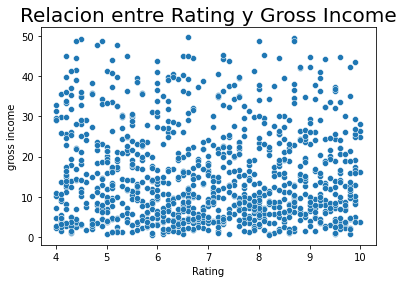

In [19]:
#Las variables a utilizar son: Rating y gross income
%matplotlib inline
sns.scatterplot(x=df['Rating'], y=df['gross income'], data=df)
plt.title("Relacion entre Rating y Gross Income", fontsize = 20, fontweight = 30)

**Respuesta**: no se dar una respuesta concreta mas alla de decir que los por debajo de 10 son los que mas califican

2. ¿Qué rama es la más rentable?

Text(0.5, 1.0, 'Relacion entre Branch y Gross Income')

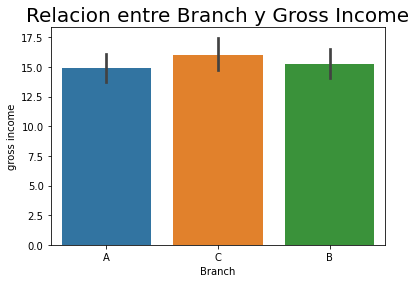

In [21]:
#Las variables a utilizar son: Branch y gross income
sns.barplot(x='Branch', y='gross income', data=df)
plt.title("Relacion entre Branch y Gross Income", fontsize = 20, fontweight = 30)




```
# Tiene formato de código
```

**Respuesta**: La "C" seria la mas rentable

3. ¿Existe alguna relación entre género e ingreso bruto?

De manera similar al análisis anterior, podemos usar un diagrama de caja para responder a esta pregunta.

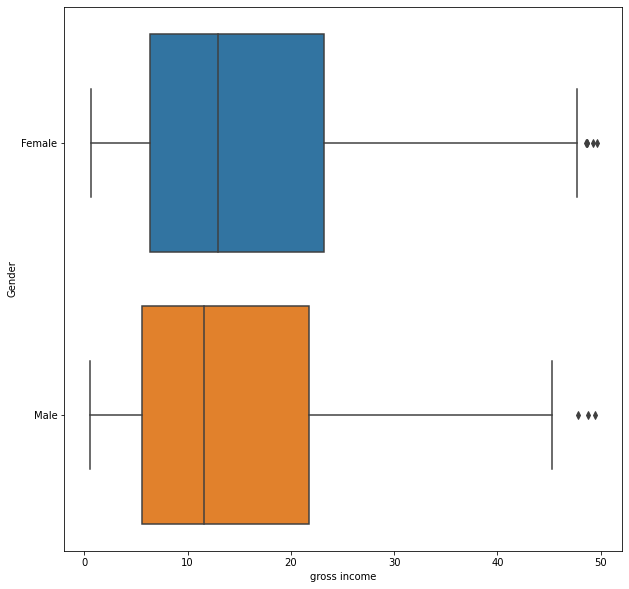

In [24]:
#Las variables a utilizar son: Gender y gross income
plt.figure(figsize=(10,10))
sns.boxplot(y = 'Gender', x = 'gross income', data = df)
plt.show()

**Respuesta** : En promedio la mujer gana un poco mas que el hombre

4. ¿Qué línea de productos genera más ingresos?

,Product line,gross income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


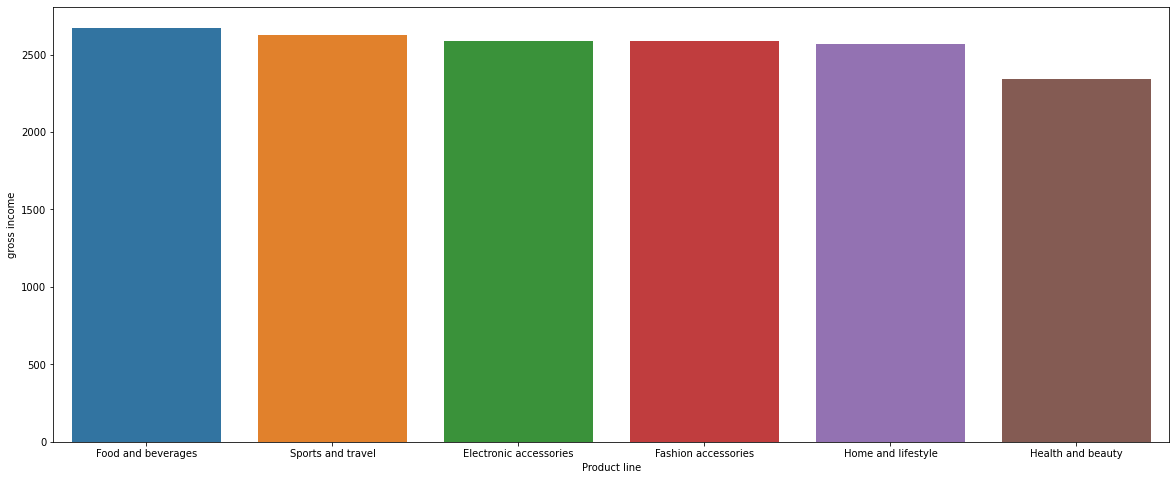

In [35]:
#Aclaración: Se deberá descomentar el código comentado para la realización del ejercicio.

cat = df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)

plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)
cat
#Completar con un barplot de seaborn entre x='Product line' e y='gross income'

**Respuesta** : Food and beverages generea los mayores ingresos